## K – NN Classification:

Download the Datasets from moodle and experiment with K = 1, 3, 5, 9 and 11 for each of the following tasks.

### Case I: MNIST dataset

For both train as well as test data the first digit in the ith row this the label (a number in the range 0-9) of the i sample. The next 784 (28x28) digits in the same row are the values of the pixels of the sample (image).

In [1]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.spatial.distance import cdist

# load train data
train = loadmat('mnist_train.mat')
train=train['traindata']
print("MNIST train dataset size:",train.shape)
# load test data
test = loadmat('mnist_test.mat')
test=test['testdata']
print("MNIST test dataset size:",test.shape)

print("Visualizing the MNIST dataset")
fig=plt.figure(figsize=(8, 8))
columns = 5
rows = 5
for i in range(1, columns*rows +1):
    img=train[i][1:].reshape((28, 28))
    fig.add_subplot(rows, columns, i)
    plt.imshow(img,cmap='gray')
plt.show()

ModuleNotFoundError: No module named 'scipy'

Creating funtions for distance calculation and feature extraction

In [20]:
def euclidean_distance(Xt,X):
#     print(X.shape)
#     print(Xt.shape)
#     print(cdist(Xt, X).shape)
    return cdist(Xt, X)

# return histogram feature from the images                                      
def features(train,test):
    # extract feature from train data
    train_feature = np.zeros((5000, 256))
    for j in range(train.shape[0]):
        feature = cv2.calcHist([train[j][:]], [0], None, [256], [0, 256])
        train_feature[j]=feature.reshape((1,256))

    # extract feature from test data
    test_feature = np.zeros((500, 256))
    for j in range(test.shape[0]):
        feature = cv2.calcHist([test[j][:]], [0], None, [256], [0, 256])
        test_feature[j]=feature.reshape((1,256))
    return train_feature,test_feature

Prediction function

Dataset=MNIST, Feature Vector=Image pixels, Metric=Eucledian Distance
k:  1 Accuracy: 0.906
k:  3 Accuracy: 0.918
k:  5 Accuracy: 0.91
k:  9 Accuracy: 0.898
k:  11 Accuracy: 0.876


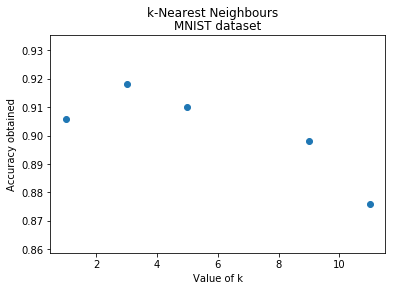

Dataset=MNIST, Feature Vector=Histogram of Image, Metric=Eucledian Distance
k:  1 Accuracy: 0.282
k:  3 Accuracy: 0.274
k:  5 Accuracy: 0.308
k:  9 Accuracy: 0.32
k:  11 Accuracy: 0.31


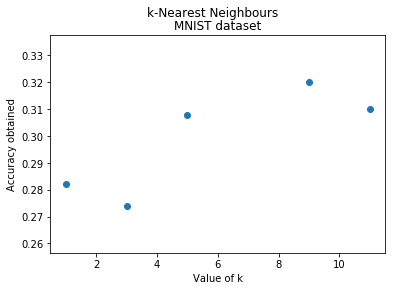

In [21]:
def predict(k, Xt, X, y):
    # Computing indices of k nearest neighbours of test image  
#     print(Xt.shape, X.shape)
    distance = euclidean_distance(Xt, X)
    idx = np.argsort(distance)[:, :k]
    
    # Taking majority vote among the labels of knn    
    y_pred = []
    for i in range(Xt.shape[0]):
        lab = y[idx[i]]
        sets, cnts = np.unique(lab, return_counts=True)
        y_pred.append(sets[np.argmax(cnts, axis = 0)])
    return y_pred  

def result():
    accuracies = []
    ks = [1,3,5,9,11]
    for k in ks:
        y_pred = predict(k, test_feature, train_feature, train_labels)
        y_pred = np.array(y_pred)
        y_pred = y_pred.reshape((-1,1))
        # calculate the accuracy
        accuracy = np.mean(y_pred == test_labels)
        print ("k: ", k, "Accuracy:", accuracy)
        accuracies.append(accuracy)
    
    # plot k vs accuracy 
    plt.scatter(ks, accuracies)
    plt.suptitle("k-Nearest Neighbours")
    plt.title("MNIST dataset")
    plt.xlabel('Value of k')
    plt.ylabel('Accuracy obtained')
    plt.show()

# datasets 
train_labels = train[:,[0]].astype(int)
test_labels = test[:,[0]].astype(int)
train_feature = train[:,1:]
test_feature = test[:,1:]

print("Dataset=MNIST, Feature Vector=Image pixels, Metric=Eucledian Distance")
result()

# histogram features
train_feature,test_feature = features(train_feature,test_feature)
print("Dataset=MNIST, Feature Vector=Histogram of Image, Metric=Eucledian Distance")
result()

The above results show that the pixel values when used as feature vector yield higher accuracies compared to choosing histogram of image as feature vector

### Case II: CIFAR10 dataset

CIFAR10 contains 10 object classes. In both training as well as in test data each row stores a 32x32 color image. The first 1024 entries contain the red channel values, the next 1024 the green, and the final 1024 the blue.

CIFAR10 train dataset size: (5000, 3072)
CIFAR10 test dataset size: (500, 3072)
testlbl (500, 1)
Visualizing the CIFAR10 dataset


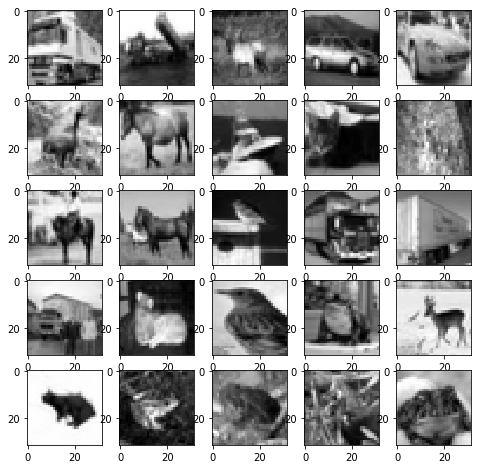

In [2]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.spatial.distance import cdist

# load train data
train = loadmat('CIFAR10_Train.mat')
train_labels = train['CIFAR10_Train_Labels']
train = train['CIFAR10_Train_Data']
print("CIFAR10 train dataset size:",train.shape)

# load test data
test = loadmat('CIFAR10_Test.mat')
test_labels = test['CIFAR10_Test_Labels']
test = test['CIFAR10_Test_Data']
print("CIFAR10 test dataset size:",test.shape)
print("testlbl",test_labels.shape)

# print(test_labels.shape)
print("Visualizing the CIFAR10 dataset")
fig=plt.figure(figsize=(8, 8))
columns = 5
rows = 5
for i in range(1, columns*rows +1):
    img=train[i][0:1024].reshape((32, 32))
    fig.add_subplot(rows, columns, i)
    plt.imshow(img,cmap='gray')
plt.show()

Creating funtions for distance calculation and feature extraction

In [4]:
# returns euclidean_distance vector
def euclidean_distance(Xt,X):
    return cdist(Xt, X)

# returns ncc distance vector
def ncc(Xt,X):
    return np.dot(Xt,np.transpose(X))/(np.linalg.norm(Xt)*np.linalg.norm(X))

# return histogram feature from the images (RGB channels)
def features(train,test):
    # extract feature from train data
    train_feature = np.zeros((5000, 768))
    for j in range(train.shape[0]):
        feature1 = cv2.calcHist([train[j][:1024]], [0], None, [256], [0, 256])
        feature2 = cv2.calcHist([train[j][1024:2048]], [0], None, [256], [0, 256])
        feature3 = cv2.calcHist([train[j][2048:]], [0], None, [256], [0, 256])
        feature = np.concatenate((feature1, feature2,feature3), axis=0)
        train_feature[j]=feature.reshape((1,768))

    # extract feature from test data
    test_feature = np.zeros((500, 768))
    for j in range(test.shape[0]):
        feature1 = cv2.calcHist([test[j][:1024]], [0], None, [256], [0, 256])
        feature2 = cv2.calcHist([test[j][1024:2048]], [0], None, [256], [0, 256])
        feature3 = cv2.calcHist([test[j][2048:]], [0], None, [256], [0, 256])
        feature = np.concatenate((feature1, feature2,feature3), axis=0)
        test_feature[j]=feature.reshape((1,768))
    return train_feature,test_feature

Prediction and accuracy calculation

Dataset=CIFAR10, Feature Vector=Histogram of Image, Metric=Eucledian Distance
k:  1 Accuracy: 0.224
k:  3 Accuracy: 0.268
k:  5 Accuracy: 0.242
k:  9 Accuracy: 0.226
k:  11 Accuracy: 0.252


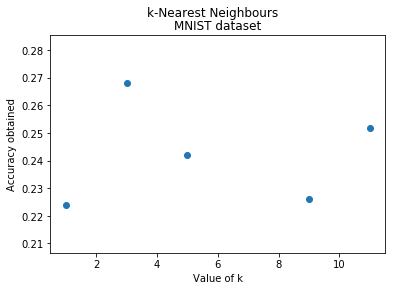

Dataset=CIFAR10, Feature Vector=Histogram of Image, Metric=NCC
k:  1 Accuracy: 0.124
k:  3 Accuracy: 0.142
k:  5 Accuracy: 0.154
k:  9 Accuracy: 0.148
k:  11 Accuracy: 0.156


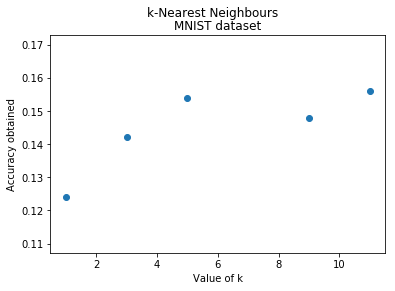

In [9]:
def predict(meteric,k, Xt, X, y):
    # calculate distance
    if meteric=="ncc":
        distance = ncc(Xt, X)
        # Computing indices of k nearest neighbours of test image 
        idx = np.argsort(distance)[:,5000-k:]
        
    elif meteric=="Eucledian":
        distance = euclidean_distance(Xt, X)
        # Computing indices of k nearest neighbours of test image 
        idx = np.argsort(distance)[:,:k] 
    
    # Taking majority vote among the labels of knn    
    y_pred = []
    for i in range(Xt.shape[0]):
        lab = y[idx[i]]
        sets, cnts = np.unique(lab, return_counts=True)
        y_pred.append(sets[np.argmax(cnts, axis = 0)])
    return y_pred  

def result(meteric):
    accuracies = []
    ks = [1,3,5,9,11]
    for k in ks:
        y_pred = predict(meteric,k, test_feature, train_feature, train_labels)
        y_pred = np.array(y_pred)
        y_pred = y_pred.reshape((-1,1))
        # calculate the accuracy
        accuracy = np.mean(y_pred == test_labels)
        print ("k: ", k, "Accuracy:", accuracy)
        accuracies.append(accuracy)
    
    # plot k vs accuracy 
    plt.scatter(ks, accuracies)
    plt.suptitle("k-Nearest Neighbours")
    plt.title("MNIST dataset")
    plt.xlabel('Value of k')
    plt.ylabel('Accuracy obtained')
    plt.show()

# extract histogram features
train_feature,test_feature = features(train,test)

print("Dataset=CIFAR10, Feature Vector=Histogram of Image, Metric=Eucledian Distance")
meteric="Eucledian"
result(meteric)

print("Dataset=CIFAR10, Feature Vector=Histogram of Image, Metric=NCC")
meteric="ncc"
result(meteric)

The accuracies for the CIFAR10 dataset are higher for the Euclidian meteric compared to the NCC meteric. Overall the kNN classification is unable to provide high (and usable) accuracies for classification.


&copy; Aakash [nimrobotics.github.io](http://nimrobotics.github.io/)